# **Análise de Cross-Sell no segmento de QSR pelo Algoritmo Apriori**

O trabalho será construído utilizando uma base anonimizada fornecida por rede do QSR brasileiro (*Quick Service Restaurants*) para buscar identificar relações e interações entre os diferentes itens do menu, visando aumentar vendas por meio da maximização dos itens por transação.

Inicialmente, importaremos as bibliotecas e as bases de dados que serão utilizadas no trabalho para fazer a análise Descritiva:

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd  
import numpy as np

Após as importações das  bibliotecas, importaremos a base recebida em CSV e o Dicionário de Dados:

In [2]:
transacoes = pd.read_csv('Transacoes.csv', delimiter = ';')

In [3]:
transacoes.head()

,Admin,Regiao,Cb01_Sand_Beb_Acomp_Reg,Cb01_Sand_Beb_Acomp_Cup,Sand01_Reg,Sand01_Cup,Cb16_Sand_Beb_Acomp_Reg,Cb16_Sand_Beb_Acomp_Cup,Sand16_Reg,Sand16_Cup,...,Acomp03_Reg,Acomp03_Cup,Acomp02_Reg,Acomp02_Cup,Acomp04_Reg,Acomp04_Cup,2Sand_Beb_Acomp_Reg,2Sand_Beb_Acomp_Cup,Qtd_transacoes,VL_Venda
0,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1373,"19934,65147"
1,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,852,"16106,65744"
2,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,240,"5135,182905"
3,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,142,"3183,077909"
4,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,"1035,245162"


Inicialmente vamos avaliar o perfil dos dois Dataframes e os tipos de dados que foram importados, para verificar se alguma transformação é necessária:

In [4]:
transacoes.shape

(952560, 109)

In [5]:
transacoes.dtypes

Admin                      object
Regiao                     object
Cb01_Sand_Beb_Acomp_Reg     int64
Cb01_Sand_Beb_Acomp_Cup     int64
Sand01_Reg                  int64
                            ...  
Acomp04_Cup                 int64
2Sand_Beb_Acomp_Reg         int64
2Sand_Beb_Acomp_Cup         int64
Qtd_transacoes              int64
VL_Venda                   object
Length: 109, dtype: object

A coluna "VL_Venda" foi importada como Objeto, quando deveria ter sido importada como Float. Para resolver isso, faremos a transformação dos dados:

In [6]:
transacoes['VL_Venda'] = transacoes['VL_Venda'].apply (lambda x: x.replace(',', '.'))

In [7]:
transacoes['VL_Venda'] = transacoes['VL_Venda'].astype(float)

In [8]:
transacoes.dtypes

Admin                       object
Regiao                      object
Cb01_Sand_Beb_Acomp_Reg      int64
Cb01_Sand_Beb_Acomp_Cup      int64
Sand01_Reg                   int64
                            ...   
Acomp04_Cup                  int64
2Sand_Beb_Acomp_Reg          int64
2Sand_Beb_Acomp_Cup          int64
Qtd_transacoes               int64
VL_Venda                   float64
Length: 109, dtype: object

## Análise Exploratória

Para iniciar a análise exploratória do Dataframe tratado e com as colunas melhor identificadas após o cruzamento com o Dicionário de dados, vamos apurar a quantidade de transações apontadas no Dataframe, o valor de venda total e o Ticket Médio, que é um indicador relevante para o segmento:

In [9]:
TT_Transacoes = transacoes['Qtd_transacoes'].sum()
print (TT_Transacoes)

5671218


In [10]:
TT_Venda = transacoes['VL_Venda'].sum()
print (TT_Venda)

162127973.99246562


In [11]:
Ticket_Medio = TT_Venda / TT_Transacoes
print (Ticket_Medio)

28.58785784508118


O dataframe informado conta com 5,67MM transações com um valor total de 162,1MM de reais, totalizando um Ticket Médio de R$ 28,59 no período analisado.

Podemos apurar as diferenças nesses indicadores pelas colunas "Admin" e "Região" para identificar diferenças regionais e de administração dos restaurantes:

In [12]:
table = pd.pivot_table(transacoes, index = ['Regiao','Admin'], values = ['Qtd_transacoes', 'VL_Venda'], aggfunc = np.sum)

In [13]:
table

Qtd_transacoes      VL_Venda
Regiao  Admin                                   
N+NE+CO Franqueado          559396  1.497248e+07
        Proprio             804259  2.035204e+07
SE      Franqueado         1413760  4.081343e+07
        Proprio            1771406  5.457126e+07
SUL     Franqueado          489793  1.353845e+07
        Proprio             632604  1.788031e+07

In [14]:
table['Ticket_Medio'] = table['VL_Venda']/table['Qtd_transacoes']

In [15]:
table

Qtd_transacoes      VL_Venda  Ticket_Medio
Regiao  Admin                                                 
N+NE+CO Franqueado          559396  1.497248e+07     26.765441
        Proprio             804259  2.035204e+07     25.305331
SE      Franqueado         1413760  4.081343e+07     28.868713
        Proprio            1771406  5.457126e+07     30.806750
SUL     Franqueado          489793  1.353845e+07     27.641171
        Proprio             632604  1.788031e+07     28.264614

A tabela acima indica que o Ticket Médio dos franqueados é maior na Região N+NE+CO, mas menor nas regiões SE e Sul. Também podemos observar como a região SE tem maior peso no negócio. Podemos visualizar o resultado gráfico abaixo:

In [16]:
import matplotlib.pyplot as plt

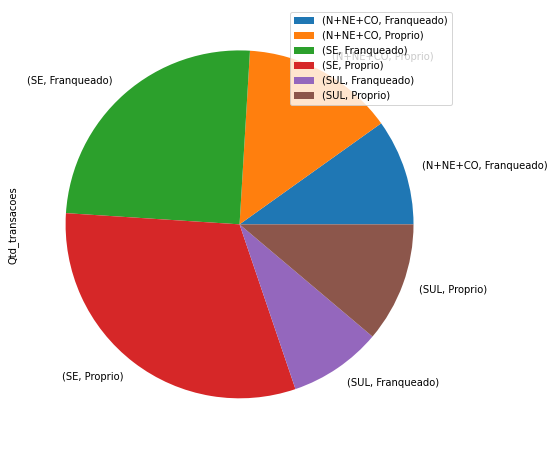

In [17]:
table.plot.pie(y='Qtd_transacoes', figsize=(20,8))

Para a análise exploratória, vamos criar uma nova coluna com o indicador de Ticket Médio para verificarmos o perfil das transações do dataframe:

In [18]:
transacoes['Ticket_Medio'] = transacoes['VL_Venda']/transacoes['Qtd_transacoes']

In [19]:
transacoes.head()

,Admin,Regiao,Cb01_Sand_Beb_Acomp_Reg,Cb01_Sand_Beb_Acomp_Cup,Sand01_Reg,Sand01_Cup,Cb16_Sand_Beb_Acomp_Reg,Cb16_Sand_Beb_Acomp_Cup,Sand16_Reg,Sand16_Cup,...,Acomp03_Cup,Acomp02_Reg,Acomp02_Cup,Acomp04_Reg,Acomp04_Cup,2Sand_Beb_Acomp_Reg,2Sand_Beb_Acomp_Cup,Qtd_transacoes,VL_Venda,Ticket_Medio
0,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1373,19934.651470,14.519047
1,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,852,16106.657440,18.904528
2,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,240,5135.182905,21.396595
3,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,142,3183.077909,22.416042
4,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,1035.245162,25.881129


*LEMBRETE*: Montar código para apresentar a distribuição dos Ticket Médios do Dataframe com as quebras de Admin e Região

Agora, vamos criar uma variável para armazenar as composições das transações e entender quais os produtos mais relevantes do mix e o perfil das transações:

In [20]:
cols = list(transacoes.columns)

In [21]:
print (cols)

['Admin', 'Regiao', 'Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand0

In [22]:
cols.pop()
cols.pop()
cols.pop()
print (cols)

['Admin', 'Regiao', 'Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand0

In [23]:
del cols[0]
del cols[0]
print (cols)

['Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand03_Cup', 'Cb02_Sand_

In [24]:
teste = transacoes.loc[transacoes['2Sand_Cup'] != 0, 'Qtd_transacoes'].sum()/transacoes['Qtd_transacoes'].sum()
print (teste)

0.292030565568102


Agora podemos aplicar o método FOR para apurar a importância de cada um dos itens do mix no total de transações e cada Ticket Médio do grupo de transações que contém cada item do Pmix:

In [25]:
mix_prod_transacoes = []
for col in cols:
    mix_prod_transacoes.append(transacoes.loc[transacoes[col] != 0, 'Qtd_transacoes'].sum()/transacoes['Qtd_transacoes'].sum())
    
print (mix_prod_transacoes)

[0.05215017303161332, 0.0589637005666155, 0.0034840840186358556, 0.020161277524510607, 0.020415191234052367, 0.014660695462597276, 0.0017516519379082236, 0.0003549502064635851, 0.021319758824294887, 0.01690289458102298, 0.0017629369916656351, 0.00042512913451748813, 0.015754816690171317, 0.020772081059130507, 0.001735606002096904, 0.004368373777908026, 0.0014716415415524497, 0.007526778198263583, 0.00039427156564956594, 4.937211018867552e-06, 0.0010137152195524842, 0.00013577330301885768, 0.00034489945546089043, 4.760882053907996e-06, 0.0, 0.0004173706600592677, 0.0, 2.9799595078164866e-05, 0.00036165070713204816, 1.040340893261377e-05, 6.929728322910529e-05, 0.0, 0.004472055209304245, 0.007786863421578927, 0.02022405063603621, 0.0330941254594692, 0.005571113647897153, 0.0003540685616387873, 0.0006236755490619476, 4.055566194069775e-06, 0.010101181086673091, 0.02123617889490406, 0.0011648291425228232, 8.234562663611238e-05, 0.037689434615280175, 0.017486190797109193, 0.0027045336645496

In [26]:
mix_prod_ticket_medio = []
for col in cols:
    mix_prod_ticket_medio.append(transacoes.loc[transacoes[col] != 0, 'VL_Venda'].sum()/transacoes.loc[transacoes[col] != 0, 'Qtd_transacoes'].sum())
    
print (mix_prod_ticket_medio)

<ipython-input-26-a7221a1993c3>:3: RuntimeWarning: invalid value encountered in double_scalars
  mix_prod_ticket_medio.append(transacoes.loc[transacoes[col] != 0, 'VL_Venda'].sum()/transacoes.loc[transacoes[col] != 0, 'Qtd_transacoes'].sum())


[40.84757389349002, 42.17297471174943, 39.43181455479326, 29.044955430825002, 40.26207058029392, 48.12580787120733, 41.96149688279042, 46.66488996023497, 40.95122831592115, 48.16401960830189, 41.88074977708442, 48.77789147274326, 42.11264556497968, 37.9305254118704, 43.879659574333026, 29.438279496590702, 42.56289671436137, 33.0962837594244, 35.209664338964224, 30.434606631285714, 41.77137644582884, 36.4770030762013, 34.44243970110634, 33.80252543037037, nan, 27.15786780295733, nan, 25.022883588508872, 37.836872113812774, 40.79106396155932, 36.21181556386768, nan, 37.5936357504286, 32.24204269932821, 44.907525052405134, 38.61420294506504, 44.872884360099064, 39.670867775906366, 47.03991360374329, 22.96160988652174, 44.90214185576458, 36.75151562530635, 49.66232395642143, 35.973310773978596, 46.19937958157819, 42.488087168082345, 51.176319499621854, 38.74893598401781, 47.77289402701449, 46.01210611667572, 54.64048953543128, 34.0306188725862, 49.40831516376519, 49.304762546034155, 55.345

Com as listas criadas, podemos montar um novo DataFrame para consolidar os dados e apresentar uma visualização gráfica:

In [27]:
mix = pd.DataFrame()

In [28]:
mix['Mix_Prod'] = cols

In [29]:
mix['Import_Trans'] = mix_prod_transacoes

In [30]:
mix['Ticket_Medio'] = mix_prod_ticket_medio

In [31]:
mix = mix.sort_values(by=['Import_Trans'], ascending = False)

In [32]:
mix = mix.reset_index()

In [33]:
mix = mix.drop('index', axis = 1)

In [34]:
mix15 = mix.head(15)

In [35]:
mix15.head()

,Mix_Prod,Import_Trans,Ticket_Medio
0,2Sand_Cup,0.292031,29.653286
1,Sundae_grande_Reg,0.117829,31.193660
2,2Sand_Beb_Acomp_Reg,0.117703,33.206216
3,Menu_inf_Reg,0.095291,40.935854
4,MilkShake_Reg,0.086765,30.984356


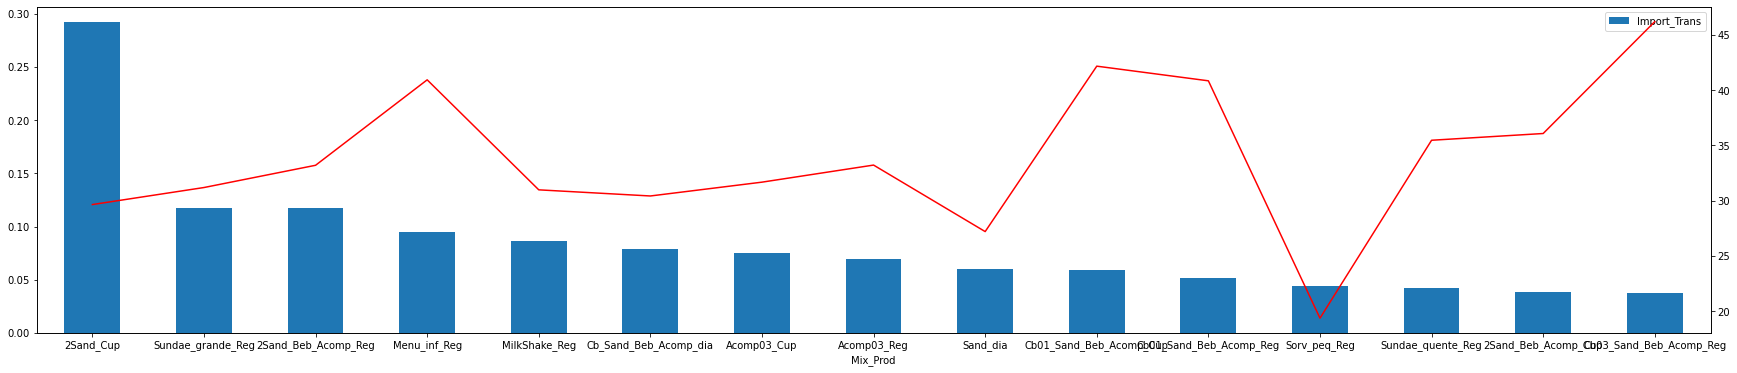

In [36]:
mix15.plot(kind='bar', figsize = (30, 6), x = 'Mix_Prod', y = 'Import_Trans')
mix15['Ticket_Medio'].plot(secondary_y=True, color = 'r')

*LEMBRETE*: Avaliar diferenças entre Regiões e propriedade das lojas

## Preparação do Dataframe para a execução do Algoritmo Apriori

Para executar o algoritmo Apriori, é preciso tratar o dataframe que temos para ter cada transação em uma linha e ter o perfil das transações identificados em um código binário 1/0.

Para isso, vamos criar um novo dataframe para fazer as transformações necessárias:

In [37]:
df_transacoes = transacoes

Inicialmente, vamos tratar o dataframe para gerar uma linha para cada transação para gerar a amostragem que será utilizada no modelo:

In [38]:
transacoes = []

for (i, row) in df_transacoes.iterrows():
    transacoes = (transacoes + [row for transacoes in range(row['Qtd_transacoes'])])

df_list_transacoes = pd.DataFrame(transacoes)

MemoryError: Unable to allocate 4.65 GiB for an array with shape (5671218, 110) and data type object

In [ ]:
df_list_GCs.shape

In [12]:
df_list_GCs = df_list_GCs.reset_index(drop=True)MemoryError: Unable to allocate 4.65 GiB for an array with shape (5671218, 110) and data type object

1
df_list_GCs.shape

In [13]:
df_list_GCs.tail()

,Status,Regional,GM,n EVM Big Mac Full Price,n EVM Big Mac Cupom,n ALC Big Mac Full Price,n ALC Big Mac Cupom,n EVM Quarterao Full Price,n EVM Quarterao Cupom,n ALC Quarterao Full Price,...,n Mc nuggets 4 ALC Full Price,n Mc nuggets 4 ALC Cupom,n Side Salad ALC Full Price,n Side Salad ALC Cupom,n 3x3 Combado,n 2x14.90 Combado,n Outros,GCs,Venda,Margem
1223295,Opco,SAO,WESLEY OLIVEIRA,4,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,127.74,97.95
1223296,Opco,SAO,WESLEY OLIVEIRA,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,109.00,84.67
1223297,Opco,SAO,WESLEY OLIVEIRA,5,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,146.97,111.28
1223298,Opco,SAO,WESLEY OLIVEIRA,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,135.88,105.57
1223299,Opco,SAO,WESLEY OLIVEIRA,6,0,0,0,0,0,0,...,1,0,0,0,0,0,6,1,156.52,107.80


Agora será necessário corrigir os indicadores de GCs, Vendas e Margem dos registros para aplicar o algoritmo de construção de DataFrame aleatório que seja representativo do negócio:

In [14]:
df_list_GCs['Venda Unit'] = df_list_GCs['Venda']/df_list_GCs['GCs']

In [15]:
df_list_GCs['Margem Unit'] = df_list_GCs['Margem']/df_list_GCs['GCs']

In [16]:
df_list_GCs['1 GC'] = df_list_GCs['GCs']/df_list_GCs['GCs']

In [17]:
df_list_GCs['1 GC'].sum()

1223300.0

In [18]:
transacoes['GCs'].sum()

1223300

In [19]:
df_list_GCs['Venda Unit'].sum()

45818756.459999986

In [20]:
transacoes['Venda'].sum()

45818756.45999999

In [21]:
df_list_GCs = df_list_GCs.drop(['Status', 'Regional', 'GM', 'Venda', 'Margem', 'GCs'], 1)

In [22]:
df_list_GCs.head()

,n EVM Big Mac Full Price,n EVM Big Mac Cupom,n ALC Big Mac Full Price,n ALC Big Mac Cupom,n EVM Quarterao Full Price,n EVM Quarterao Cupom,n ALC Quarterao Full Price,n ALC Quarterao Cupom,n EVM Cheddar McMelt Full Price,n EVM Cheddar McMelt Cupom,...,n Mc nuggets 4 ALC Full Price,n Mc nuggets 4 ALC Cupom,n Side Salad ALC Full Price,n Side Salad ALC Cupom,n 3x3 Combado,n 2x14.90 Combado,n Outros,Venda Unit,Margem Unit,1 GC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20.11255,14.109933,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20.11255,14.109933,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20.11255,14.109933,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20.11255,14.109933,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20.11255,14.109933,1.0


Agora vamos aplicar o código para segmentar o meu Dataframe aleatoriamente e rodar algumas verificações para garantir que a base é uma boa representação do total:

In [23]:
df_sample = df_list_GCs.sample(frac = 0.20, replace = True, axis = 0)

In [24]:
df_sample.head()

,n EVM Big Mac Full Price,n EVM Big Mac Cupom,n ALC Big Mac Full Price,n ALC Big Mac Cupom,n EVM Quarterao Full Price,n EVM Quarterao Cupom,n ALC Quarterao Full Price,n ALC Quarterao Cupom,n EVM Cheddar McMelt Full Price,n EVM Cheddar McMelt Cupom,...,n Mc nuggets 4 ALC Full Price,n Mc nuggets 4 ALC Cupom,n Side Salad ALC Full Price,n Side Salad ALC Cupom,n 3x3 Combado,n 2x14.90 Combado,n Outros,Venda Unit,Margem Unit,1 GC
517935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,35.353628,24.174055,1.0
1044296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.798810,16.936138,1.0
39065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9.750441,7.270510,1.0
551493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.980345,0.884061,1.0
284317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,33.117647,22.832941,1.0


In [25]:
TM_sample = df_sample['Venda Unit'].sum()/df_sample['1 GC'].sum()
print (TM_sample)

37.37955678809802


In [26]:
TM = df_list_GCs['Venda Unit'].sum()/df_list_GCs['1 GC'].sum()
print (TM)

37.45504492765469


In [27]:
valid_3x3_sample = df_sample.loc[df_sample['n 3x3'] > 0, ['1 GC']].sum()/df_sample['1 GC'].sum()
print (valid_3x3_sample)

1 GC    0.303
dtype: float64


In [28]:
valid_3x3 = df_list_GCs.loc[df_list_GCs['n 3x3'] > 0, ['1 GC']].sum()/df_list_GCs['1 GC'].sum()
print (valid_3x3)

1 GC    0.303442
dtype: float64


In [29]:
valid_BigMacFP_sample = df_sample.loc[df_sample['n EVM Big Mac Full Price'] > 0, ['1 GC']].sum()/df_sample['1 GC'].sum()
print (valid_BigMacFP_sample)

1 GC    0.051888
dtype: float64


In [30]:
valid_BigMacFP = df_list_GCs.loc[df_list_GCs['n EVM Big Mac Full Price'] > 0, ['1 GC']].sum()/df_list_GCs['1 GC'].sum()
print (valid_BigMacFP)

1 GC    0.05152
dtype: float64


In [32]:
MB_sample = df_sample['Margem Unit'].sum()/df_sample['Venda Unit'].sum()
print (MB_sample)

0.6837296277100837


In [33]:
MB = df_list_GCs['Margem Unit'].sum()/df_list_GCs['Venda Unit'].sum()
print (MB)

0.6837042569531142


A amostragem gerou resultados bastante consistente em termos de Ticket Médio, Margem Bruta e incidência de itens relevantes, então podemos continuar rodando o modelo.

Agora, com o dataframe ajustado e o número de linhas igual ao total de GCs da base de dados original, é necessário converter os valores maiores do que 1 para a aplicação do modelo:

In [34]:
df_sample = df_sample.drop(['1 GC', 'Venda Unit', 'Margem Unit', 'n Outros'], 1)

In [35]:
df_sample = df_sample.reset_index(drop=True)

In [36]:
df_sample.head()

,n EVM Big Mac Full Price,n EVM Big Mac Cupom,n ALC Big Mac Full Price,n ALC Big Mac Cupom,n EVM Quarterao Full Price,n EVM Quarterao Cupom,n ALC Quarterao Full Price,n ALC Quarterao Cupom,n EVM Cheddar McMelt Full Price,n EVM Cheddar McMelt Cupom,...,n McShake ALC Full Price,n McShake ALC Cupom,n McFritas ALC Full Price,n McFritas ALC Cupom,n Mc nuggets 4 ALC Full Price,n Mc nuggets 4 ALC Cupom,n Side Salad ALC Full Price,n Side Salad ALC Cupom,n 3x3 Combado,n 2x14.90 Combado
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_sample.shape

(244660, 109)

In [38]:
colunas = df_sample.columns
print (colunas)

Index(['n EVM Big Mac Full Price', 'n EVM Big Mac Cupom',
       'n ALC Big Mac Full Price', 'n ALC Big Mac Cupom',
       'n EVM Quarterao Full Price', 'n EVM Quarterao Cupom',
       'n ALC Quarterao Full Price', 'n ALC Quarterao Cupom',
       'n EVM Cheddar McMelt Full Price', 'n EVM Cheddar McMelt Cupom',
       ...
       'n McShake ALC Full Price', 'n McShake ALC Cupom',
       'n McFritas ALC Full Price', 'n McFritas ALC Cupom',
       'n Mc nuggets 4 ALC Full Price', 'n Mc nuggets 4 ALC Cupom',
       'n Side Salad ALC Full Price', 'n Side Salad ALC Cupom',
       'n 3x3 Combado', 'n 2x14.90 Combado'],
      dtype='object', length=109)


In [39]:
df_sample = df_sample[colunas].apply(lambda x: [y if y <= 0 else 1 for y in x])

In [40]:
df_sample.tail()

,n EVM Big Mac Full Price,n EVM Big Mac Cupom,n ALC Big Mac Full Price,n ALC Big Mac Cupom,n EVM Quarterao Full Price,n EVM Quarterao Cupom,n ALC Quarterao Full Price,n ALC Quarterao Cupom,n EVM Cheddar McMelt Full Price,n EVM Cheddar McMelt Cupom,...,n McShake ALC Full Price,n McShake ALC Cupom,n McFritas ALC Full Price,n McFritas ALC Cupom,n Mc nuggets 4 ALC Full Price,n Mc nuggets 4 ALC Cupom,n Side Salad ALC Full Price,n Side Salad ALC Cupom,n 3x3 Combado,n 2x14.90 Combado
244655,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
244656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244658,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
244659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Para evitar que linhas zeradas prejudiquem o resultado do modelo, vamos fazer a limpeza do dataframe:

In [41]:
df_sample["sum"]=df_sample.sum(axis=1)

In [42]:
df_sample_zeros = df_sample[df_sample['sum']==0]

In [43]:
df_sample_zeros.shape

(7474, 110)

In [44]:
df_sample = df_sample.drop(df_sample_zeros.index, axis = 0)

In [45]:
df_sample = df_sample.reset_index(drop=True)

In [46]:
df_sample = df_sample.drop('sum', axis = 1)

In [47]:
df_sample.shape

(237186, 109)

Agora podemos aplicar o algoritmo Apriori para avaliar os resultados:

In [48]:
freq_itemset = apriori(df_sample, min_support=0.01, use_colnames=True)
regras = association_rules(freq_itemset, metric='lift', min_threshold=1)

In [49]:
regras.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(n Refrigerante ALC Cupom),(n ALC Big Mac Cupom),0.016464,0.019571,0.015452,0.938540,47.955327,0.015130,15.952395
9,(n ALC Big Mac Cupom),(n Refrigerante ALC Cupom),0.019571,0.016464,0.015452,0.789530,47.955327,0.015130,4.673055
2,(n EVM Big Mac Cupom),(n EVM Cheddar McMelt Cupom),0.058844,0.019807,0.012113,0.205847,10.392489,0.010947,1.234261
3,(n EVM Cheddar McMelt Cupom),(n EVM Big Mac Cupom),0.019807,0.058844,0.012113,0.611537,10.392489,0.010947,2.422767
6,(n EVM McNifico Bacon Cupom),(n EVM Big Mac Cupom),0.020591,0.058844,0.012408,0.602580,10.240274,0.011196,2.368163
7,(n EVM Big Mac Cupom),(n EVM McNifico Bacon Cupom),0.058844,0.020591,0.012408,0.210862,10.240274,0.011196,1.241112
24,(n 2x14.90 Combado),"(n 3x3 Combado, n 3x3)",0.038653,0.031258,0.011919,0.308355,9.864786,0.010711,1.400635
21,"(n 3x3 Combado, n 3x3)",(n 2x14.90 Combado),0.031258,0.038653,0.011919,0.381306,9.864786,0.010711,1.553832
1,(n EVM Quarterao Cupom),(n EVM Big Mac Cupom),0.019310,0.058844,0.011185,0.579258,9.843935,0.010049,2.236894
0,(n EVM Big Mac Cupom),(n EVM Quarterao Cupom),0.058844,0.019310,0.011185,0.190084,9.843935,0.010049,1.210854


Ainda é possível aplicar o modelo para grupos específicos de tickets, por exemplo, apenas para os Tickets Família:

In [50]:
df_sample_familia = df_sample[df_sample['n McLanche Full Price']==1]

In [51]:
df_sample_familia = df_sample_familia.drop('n McLanche Full Price', axis = 1)

In [52]:
freq_itemset3 = apriori(df_sample_familia, min_support=0.01, use_colnames=True)
regras3 = association_rules(freq_itemset3, metric='lift', min_threshold=1)

In [53]:
regras3.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(n 2x14.90 Combado),(n 3x3),0.028364,0.218602,0.023835,0.840310,3.844026,0.017634,4.893223
9,(n 3x3),(n 2x14.90 Combado),0.218602,0.028364,0.023835,0.109032,3.844026,0.017634,1.090540
4,(n McFritas ALC Cupom),(n 3x3),0.043184,0.218602,0.016843,0.390020,1.784161,0.007403,1.281024
5,(n 3x3),(n McFritas ALC Cupom),0.218602,0.043184,0.016843,0.077047,1.784161,0.007403,1.036690
2,(n McFritas ALC Full Price),(n 3x3),0.073439,0.218602,0.020185,0.274850,1.257312,0.004131,1.077568
3,(n 3x3),(n McFritas ALC Full Price),0.218602,0.073439,0.020185,0.092336,1.257312,0.004131,1.020819
6,(n 3x3 Combado),(n 3x3),0.087159,0.218602,0.021372,0.245207,1.121707,0.002319,1.035248
7,(n 3x3),(n 3x3 Combado),0.218602,0.087159,0.021372,0.097767,1.121707,0.002319,1.011757
0,(n McShake ALC Full Price),(n 3x3),0.074274,0.218602,0.016403,0.220841,1.010243,0.000166,1.002874
1,(n 3x3),(n McShake ALC Full Price),0.218602,0.074274,0.016403,0.075035,1.010243,0.000166,1.000823


Agora vamos trabalhar em alguns modelos de visualização destes resultados:

In [62]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

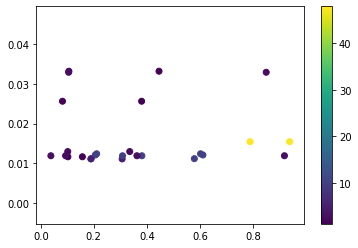

In [64]:
plt.scatter(regras['confidence'], regras['support'], c = regras['lift'], cmap = 'viridis')
plt.colorbar()
plt.show

Podemos também testar um algoritmo diferente para avaliar o resultado:

In [65]:
from mlxtend.frequent_patterns import fpgrowth

In [88]:
freq_itemset2 = fpgrowth(df_sample, min_support=0.01, use_colnames = True)

In [89]:
freq_itemset2.head(20)

,support,itemsets
0,0.082471,(n CDD EVM)
1,0.312548,(n 3x3)
2,0.114024,(n McFlurry)
3,0.095874,(n McLanche Full Price)
4,0.078580,(n McShake ALC Full Price)
5,0.035757,(n EVM Big Tasty Full Price)
6,0.016692,(n EVM McChicken Full Price)
7,0.074283,(n McFritas ALC Cupom)
8,0.053523,(n EVM Big Mac Full Price)
9,0.028813,(n EVM Picanha Cheddar Bacon Full Price)
